# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice_10 = pd.DataFrame(random.choices([1,2,3,4,5,6], k=10),columns=["Rolling_dice"])
dice_10

,Rolling_dice
0,6
1,5
2,5
3,3
4,1
5,6
6,6
7,1
8,1
9,5


#### 2.- Plot the results sorted by value.

In [3]:
sort_dice_10 = dice_10.sort_values(by=["Rolling_dice"], ascending=True)
sort_dice_10

,Rolling_dice
4,1
7,1
8,1
3,3
1,5
2,5
9,5
0,6
5,6
6,6


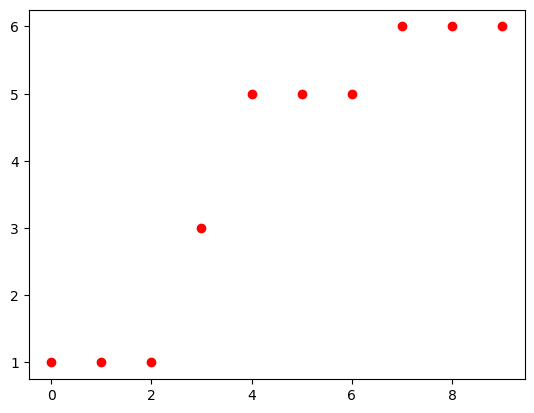

In [4]:
# your code here
plt.plot(sort_dice_10["Rolling_dice"].values, "ro")


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

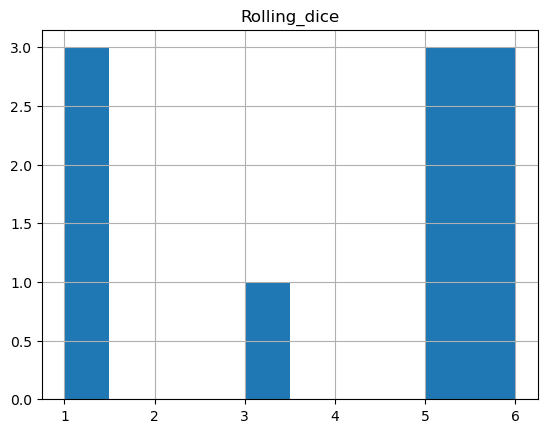

In [5]:
# your code here
dice_10.hist()
plt.show()

In [6]:
"""
your comments here
It's very similar the results in both of them, but in histogram it group the values that have the same values
together

"""


"\nyour comments here\nIt's very similar the results in both of them, but in histogram it group the values that have the same values\ntogether\n\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(df):
    return np.sum(df)/len(df)

mean(dice_10)

Rolling_dice    3.9
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
dice = pd.DataFrame(dice_10.value_counts()).reset_index()
dice = dice.rename(columns={0:"Freq"})
dice

,Rolling_dice,Freq
0,1,3
1,5,3
2,6,3
3,3,1


In [9]:
sum(dice["Rolling_dice"] * dice["Freq"]) / sum(dice["Freq"])

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def median(df):
    if len(df)%2 == 0:
        return (np.sort(df)[int(len(df)/2)][0] + np.sort(df)[int(len(df)/2)+1][0]) / 2
    else:
        pass
        return (np.sort(df)[(len(df)-1)/2][0])

median(dice_10)

6.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
q1 = (np.sort(dice_10)[2] + np.sort(dice_10)[3]) / 2    #0,25
q2 = (np.sort(dice_10)[5] + np.sort(dice_10)[6]) / 2    #median
q3 = (np.sort(dice_10)[7] + np.sort(dice_10)[8]) / 2    #0,75

print("The first quartile is: ", q1)
print("The second quartile is: ", q2)
print("The third quartile is: ", q3)

The first quartile is:  [4.]
The second quartile is:  [6.]
The third quartile is:  [1.]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [12]:
# your code here
hundred = pd.read_csv(r"..\data\roll_the_dice_hundred.csv")
hundred.sort_values(by=["value"], ascending=True, inplace=True)
hundred



,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


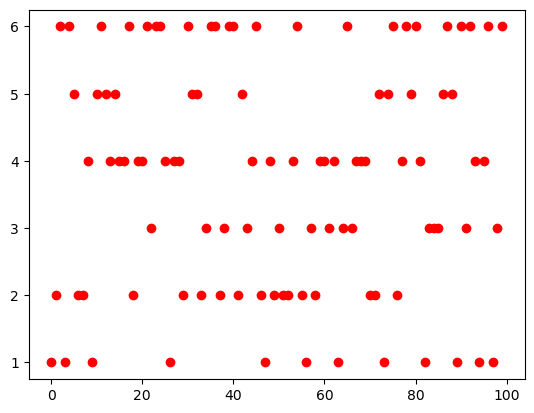

In [13]:
plt.plot(hundred["value"], "ro")

In [14]:
"""
your comments here

It's an aleatory situation, so the values are almost equally distributed between the possible results
"""

"\nyour comments here\n\nIt's an aleatory situation, so the values are almost equally distributed between the possible results\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [15]:
# your code here
mean(hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [16]:
# your code here
hundred.value_counts()


Unnamed: 0  roll  value
0           0     1        1
63          63    1        1
73          73    1        1
72          72    5        1
71          71    2        1
                          ..
30          30    6        1
29          29    2        1
28          28    4        1
27          27    4        1
99          99    6        1
Length: 100, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

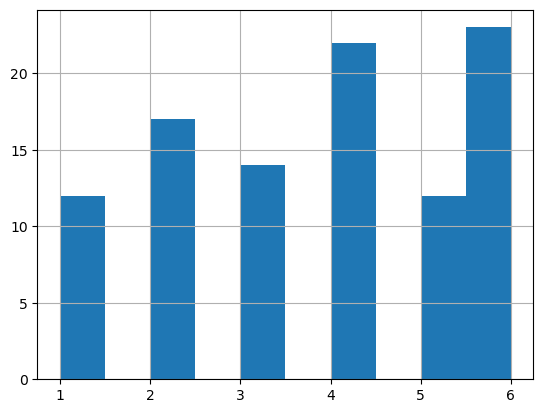

In [17]:
# your code here
hundred["value"].hist()

In [18]:
"""
your comments here
The mean is the centre of this histogram, so the events have the same probability of happening 
and go around the mean, but still very irregular.

"""

'\nyour comments here\nThe mean is the centre of this histogram, so the events have the same probability of happening \nand go around the mean, but still very irregular.\n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [19]:
# your code here
thousand = pd.read_csv(r"..\data\roll_the_dice_thousand.csv")
thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


<AxesSubplot:>

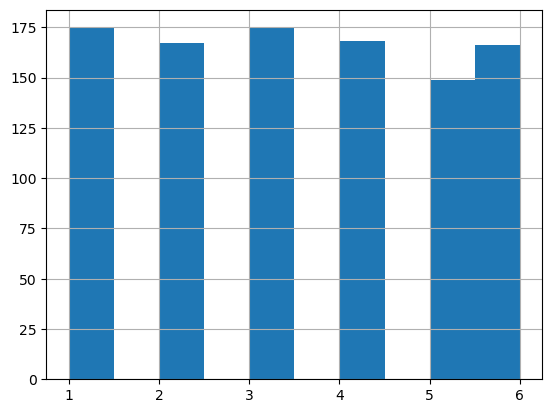

In [20]:
thousand["value"].hist()

In [ ]:
"""
your comments here
it changed because the sample is bigger and the probability of occurrence of each of events are the same, 
and now we can see it in the histogram

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [22]:
# your code here

ages_pop = pd.read_csv(r"..\data\ages_population.csv")
ages_pop


,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

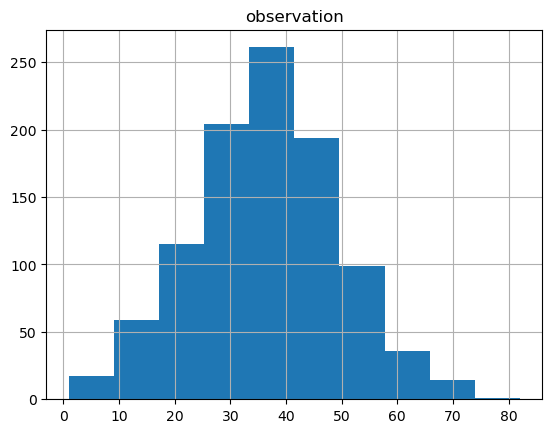

In [23]:
ages_pop.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
# your code here
ages_pop["observation"].mean()

36.56

In [25]:
ages_pop["observation"].std()

12.816499625976762

In [26]:
ages_pop.skew()

observation    0.018313
dtype: float64

In [ ]:
"""
your comments here
There are some that fall more than the std, but there are considered outliers or very rare events
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [28]:
# your code here
ages_pop2 = pd.read_csv(r"..\data\ages_population2.csv")
ages_pop2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

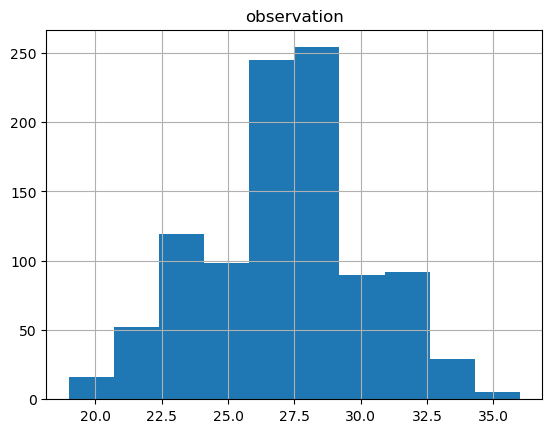

In [29]:
ages_pop2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
less distributed
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [31]:
# your code here
print(ages_pop2["observation"].mean())
print(ages_pop2["observation"].std())

27.155
2.969813932689186


In [ ]:
"""
your comments here

The mean and std are smaller. The sample are much closer.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [33]:
# your code here
age_pop3 = pd.read_csv(r"..\data\ages_population3.csv")
age_pop3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

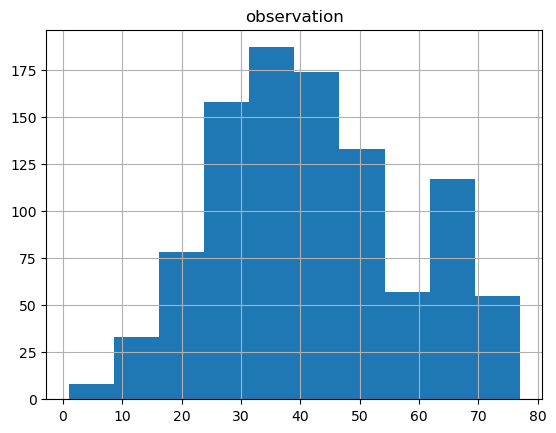

In [34]:
age_pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [35]:
# your code here
print(age_pop3["observation"].mean())
print(age_pop3["observation"].std())

41.989
16.144705959865934


In [36]:
age_pop3.skew()

observation    0.210389
dtype: float64

In [ ]:
"""
your comments here
less uniform than the first population. Positive skewed, and the population are older

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [38]:
# your code here
q1 = np.quantile(age_pop3, 0.25)
print("The first quartile is: ", q1)
q2 = np.quantile(age_pop3, 0.50)
print("The second quartile is: ",q2)
q3 = np.quantile(age_pop3, 0.75)
print("The third quartile is: ",q3)

The first quartile is:  30.0
The second quartile is:  40.0
The third quartile is:  53.0


In [ ]:
"""
your comments here
The median is 40.0 and the mean is 41.98. That's because the distrubution is more positive skewed. 
There are more than 50% of people with less then 41 years old 

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [45]:
# your code here
q0 = np.quantile(age_pop3, 0.15)
print("The first quartile is: ", q0)
q4 = np.quantile(age_pop3, 0.85)
print("The third quartile is: ",q4)

The first quartile is:  25.0
The third quartile is:  64.0


In [ ]:
"""
your comments here
70% of the population have between 25 an 64 years old

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [42]:
# your code here

In [ ]:
"""
your comments here
"""